## Importing Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO
import pydotplus
from matplotlib import image as mpimg
from sklearn import tree

In [2]:
df = pd.read_csv('iris_dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

### Splitting the dataset

In [18]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [23]:
print('Training set shape', x_train.shape, y_train.shape)
print('Testing set shape', x_test.shape, y_test.shape)

Training set shape (105, 4) (105,)
Testing set shape (45, 4) (45,)


In [26]:
flower_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
flower_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
flower_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
pred_tree = flower_tree.predict(x_test)
print(pred_tree [0:5])
print(y_test [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa']
6         Iris-setosa
3         Iris-setosa
113    Iris-virginica
12        Iris-setosa
24        Iris-setosa
Name: Species, dtype: object


In [29]:
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, pred_tree))

Decision Tree's Accuracy: 0.9555555555555556


### Visualization

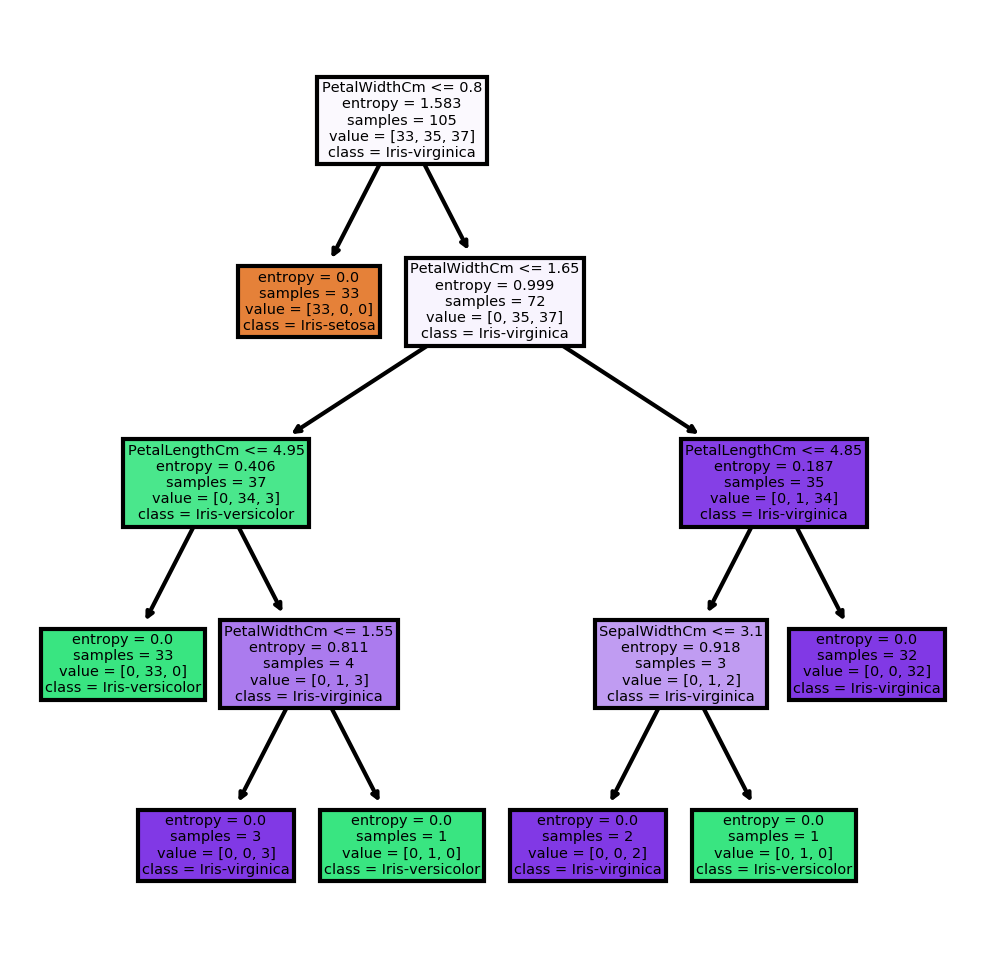

In [47]:
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn=df['Species'].unique().tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(flower_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('iris_decision_tree.png')